# Índice
1. [Introdução](#introduction)   
2. [Pré-processamento](#preprocessamento)
3. [Lasso](#lasso)    
    3.1. [Lasso - Winter Weather Dataset ](#winter)   
    3.2. [Lasso - Summer Weather Dataset](#summer)    
    3.3. [Lasso - Spring Weather Dataset ](#spring)   
    3.4. [Lasso - Autumn Weather Dataset ](#autumn)   
3. [Referências](#references)    
***

## 1. Introdução <a name="introduction"></a>
<p>Este <i>notebook</i> contém a utilização do algoritmo de regressão, Lasso.</p>

## 2. Pré processamento dos dados <a name="preprocessamento"></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# As colunas estão separadas pelo símbolo ';' #. 
weather_history = pd.read_csv('rdu-weather-history.csv', sep=';')

In [2]:
# Substituindo as string por números binários -- No = 0 e Yes = 1

weather_history = weather_history.replace('No', 0.0)
weather_history = weather_history.replace('Yes', 1.0)

In [3]:
# Verificando a soma dos valores nulos em cada feature

weather_history.isnull().sum()

date                     0
temperaturemin           1
temperaturemax           1
precipitation            1
snowfall                 2
snowdepth                1
avgwindspeed             3
fastest2minwinddir       2
fastest2minwindspeed     2
fastest5secwinddir      19
fastest5secwindspeed    19
fog                      0
fogheavy                 0
mist                     0
rain                     0
fogground                0
ice                      0
glaze                    0
drizzle                  0
snow                     0
freezingrain             0
smokehaze                0
thunder                  0
highwind                 0
hail                     0
blowingsnow              0
dust                     0
freezingfog              0
dtype: int64

In [4]:
from sklearn.preprocessing import Imputer
import numpy as np

# Substituindo os valores nulos pela média dos valores referentes a feature
imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
weather_history[['temperaturemin']] = imputer.fit_transform(weather_history[['temperaturemin']])
weather_history[['temperaturemax']] = imputer.fit_transform(weather_history[['temperaturemax']])
weather_history[['precipitation']] = imputer.fit_transform(weather_history[['precipitation']])
weather_history[['snowfall']] = imputer.fit_transform(weather_history[['snowfall']])
weather_history[['snowdepth']] = imputer.fit_transform(weather_history[['snowdepth']])
weather_history[['avgwindspeed']] = imputer.fit_transform(weather_history[['avgwindspeed']])
weather_history[['fastest2minwinddir']] = imputer.fit_transform(weather_history[['fastest2minwinddir']])
weather_history[['fastest2minwindspeed']] = imputer.fit_transform(weather_history[['fastest2minwindspeed']])
weather_history[['fastest5secwinddir']] = imputer.fit_transform(weather_history[['fastest5secwinddir']])
weather_history[['fastest5secwindspeed']] = imputer.fit_transform(weather_history[['fastest5secwindspeed']])

weather_history.isnull().sum()

date                    0
temperaturemin          0
temperaturemax          0
precipitation           0
snowfall                0
snowdepth               0
avgwindspeed            0
fastest2minwinddir      0
fastest2minwindspeed    0
fastest5secwinddir      0
fastest5secwindspeed    0
fog                     0
fogheavy                0
mist                    0
rain                    0
fogground               0
ice                     0
glaze                   0
drizzle                 0
snow                    0
freezingrain            0
smokehaze               0
thunder                 0
highwind                0
hail                    0
blowingsnow             0
dust                    0
freezingfog             0
dtype: int64

In [5]:
weather_history['date'] = weather_history['date'].replace({'-':''}, regex=True)

In [6]:
season_array = np.zeros(4137)
meantemp_array = np.zeros(4137)

for i in range(0, 4137):
    #formato: MMDD
    monthDay = int(weather_history['date'][i][4:8])
    
    if monthDay >= 1201 or monthDay < 301:
        season = 0 #'winter'
    elif monthDay >= 301 and monthDay < 601:
        season = 1 #'spring'
    elif monthDay >= 601 and monthDay < 901:
        season = 2 #'summer'
    elif monthDay >= 901 and monthDay < 1201:
        season = 3 #'autumn'    
    
    season_array[i] = season

weather_history['season'] = season_array

In [7]:
winter_weather_history = weather_history[weather_history['season'] == 0]
summer_weather_history = weather_history[weather_history['season'] == 1]
spring_weather_history = weather_history[weather_history['season'] == 2]
autumn_weather_history = weather_history[weather_history['season'] == 3]

print("\nNúmero de linhas do dataframe:", winter_weather_history.shape[0])
print("\nNúmero de linhas do dataframe:", summer_weather_history.shape[0])
print("\nNúmero de linhas do dataframe:", spring_weather_history.shape[0])
print("\nNúmero de linhas do dataframe:", autumn_weather_history.shape[0])
#spring_weather_history.head()
#print(autumn_weather_history.head())


Número de linhas do dataframe: 1052

Número de linhas do dataframe: 1072

Número de linhas do dataframe: 1012

Número de linhas do dataframe: 1001


## 3. Lasso (Least Absolute Shrinkage Selector Operator) <a name="lasso"></a>

<p>O Lasso seleciona apenas algumas 'features', enquanto reduz os coeficientes de outras para zero. Essa propriedade é conhecida como 'feature selection' e está ausente no Ridge.</p>
<p>O algoritmo possui com um parâmetro, alfa, e quanto maior o alfa, mais alguns dos coeficientes são zero. Ou seja, quando alfa é 0, o Lasso produz os mesmos coeficientes de uma regressão linear. Quando alfa é muito grande, todos os coeficientes são zero.</p>

## 3.1. Lasso - Winter Weather Dataset <a name="winter"></a>

In [8]:
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso


Coeficientes:
 [ 0.63378437  2.32468118 -0.         -0.27914887  0.22030181 -0.00376728
 -0.         -0.00388456 -0.          3.67655869  0.48755376  0.
  0.50814752 -0.          0.          0.          1.03196254 -0.
  0.         -0.          0.          0.         -0.          0.
  0.          0.        ]

Score: 0.7037065943299757



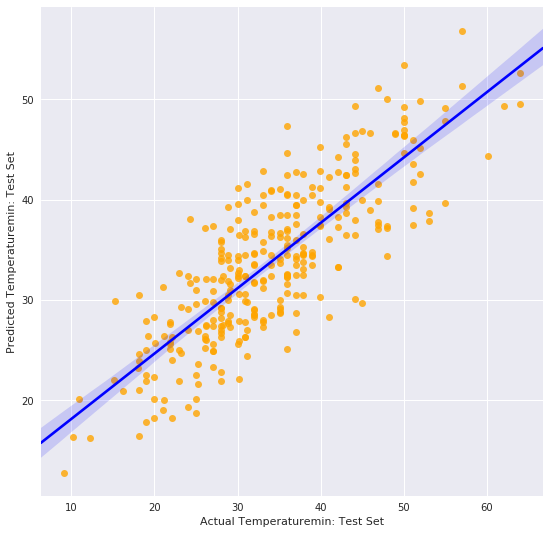

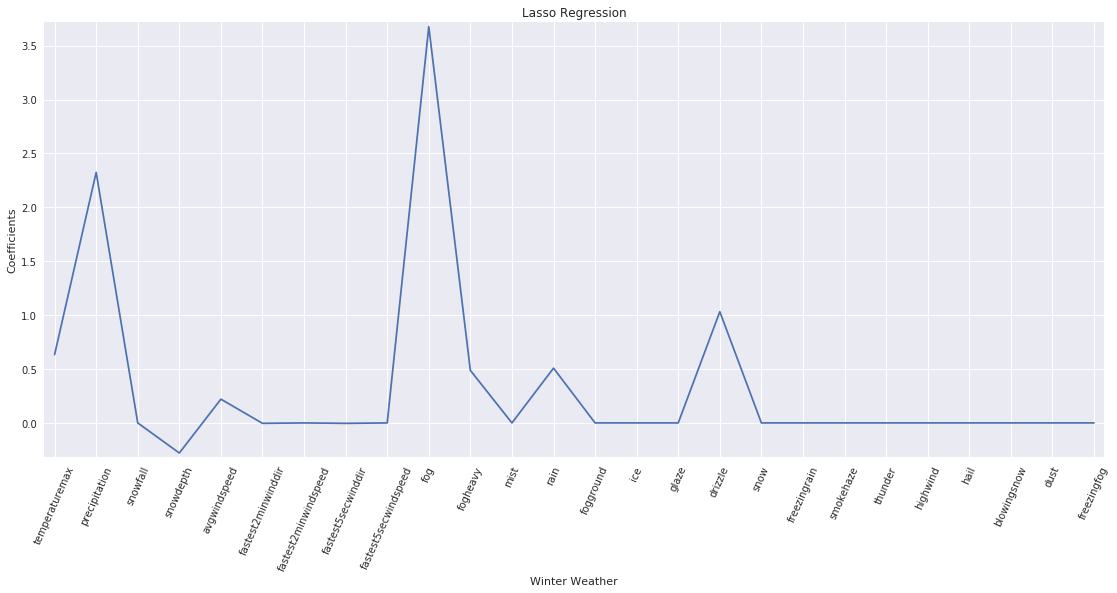

In [9]:
X_winter = winter_weather_history.drop('temperaturemin', axis=1)
X_winter = X_winter.drop('date', axis=1)
X_winter = X_winter.drop('season', axis=1)
X_winter.shape

y_winter = (winter_weather_history['temperaturemin'])
y_winter.shape

X_train, X_test, y_train, y_test = train_test_split(X_winter, y_winter, test_size = 0.3, random_state=42)

lasso = Lasso(alpha=0.015, normalize=True)
lasso.fit(X_train, y_train) 

lasso_coef = lasso.coef_
print("\nCoeficientes:\n", lasso_coef)
print("\nScore:",lasso.score(X_train, y_train))
print()
predict = lasso.predict(X_test)
#print(predict)

# Gráfico de dispersão das temperaturas mínimas
figure, axes = plt.subplots(figsize=(9, 9))
ax = sns.regplot(x = y_test, y = predict, scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax = ax.set(xlabel='Actual Temperaturemin: Test Set', 
ylabel = 'Predicted Temperaturemin: Test Set')

plt.figure(figsize=(19,8))
plt.plot(range(len(X_winter.columns)),lasso_coef)
plt.xticks(range(len(X_winter.columns)), X_winter.columns, rotation=66)
plt.margins(0.01)

plt.xlabel('Winter Weather')
plt.ylabel('Coefficients')
plt.title('Lasso Regression')
plt.show()


## 3.2. Lasso - Summer Weather Dataset <a name="summer"></a>


Coeficientes:
 [ 0.66797546  0.87755999 -0.         -0.          0.         -0.
 -0.         -0.         -0.          1.25947024  0.          0.
  0.65223544 -0.         -0.          0.          0.         -0.
  0.          0.          0.          0.          0.         -0.
  0.          0.        ]

Score: 0.652863006932184



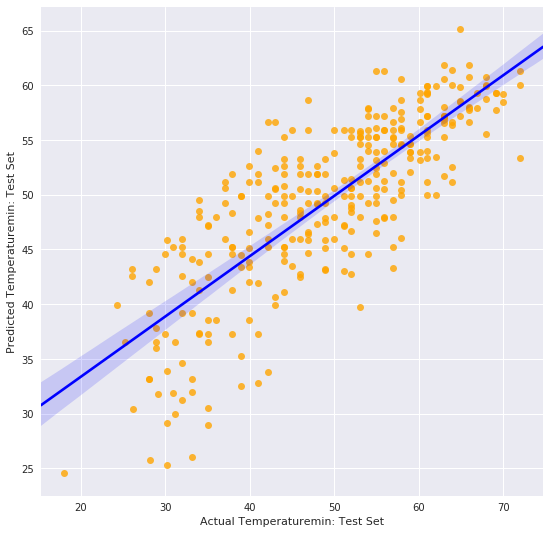

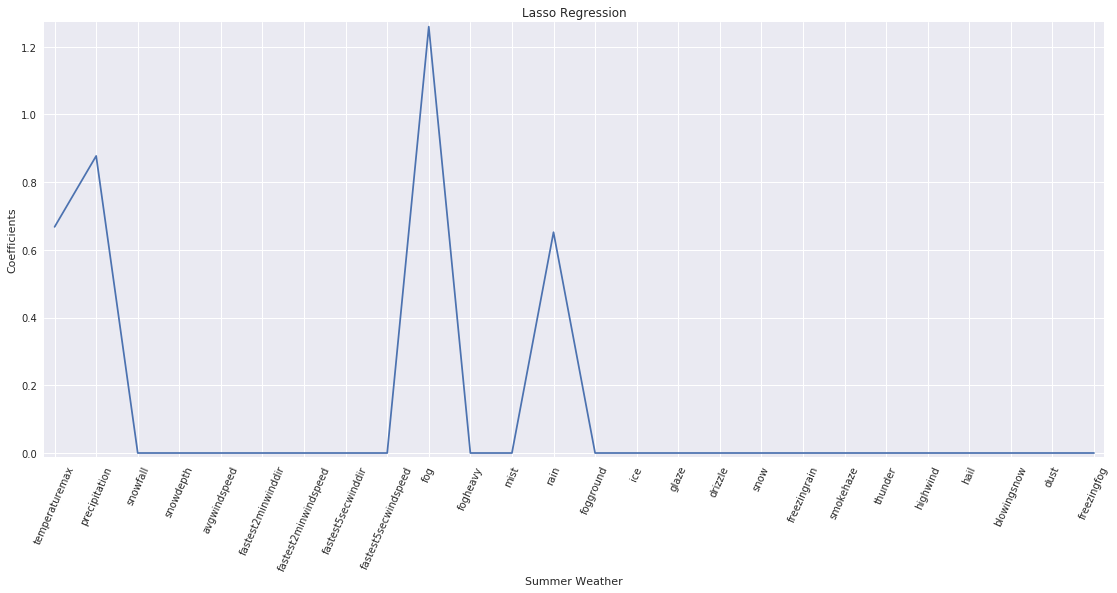

In [10]:
X_summer = summer_weather_history.drop('temperaturemin', axis=1)
X_summer = X_summer.drop('date', axis=1)
X_summer = X_summer.drop('season', axis=1)
X_summer.shape

y_summer = (summer_weather_history['temperaturemin'])
y_summer.shape

X_train, X_test, y_train, y_test = train_test_split(X_summer, y_summer, test_size = 0.3, random_state=42)

lasso = Lasso(alpha=0.05, normalize=True)
lasso.fit(X_train, y_train) 

lasso_coef = lasso.coef_
print("\nCoeficientes:\n", lasso_coef)
print("\nScore:",lasso.score(X_train, y_train))
print()
predict = lasso.predict(X_test)
#print(predict)

# Gráfico de dispersão das temperaturas mínimas
figure, axes = plt.subplots(figsize=(9, 9))
ax = sns.regplot(x = y_test, y = predict, scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax = ax.set(xlabel='Actual Temperaturemin: Test Set', 
ylabel = 'Predicted Temperaturemin: Test Set')

plt.figure(figsize=(19,8))
plt.plot(range(len(X_summer.columns)),lasso_coef)
plt.xticks(range(len(X_summer.columns)), X_summer.columns, rotation=66)
plt.margins(0.01)

plt.xlabel('Summer Weather')
plt.ylabel('Coefficients')
plt.title('Lasso Regression')
plt.show()

## 3.3. Lasso - Spring Weather Dataset <a name="spring"></a>


Coeficientes:
 [ 0.38479504  0.27825166  0.          0.          0.30500225  0.
  0.          0.          0.          0.54169721  0.          0.
  0.         -0.          0.          0.          0.          0.
  0.          0.          0.25797751 -0.          0.         -0.
  0.          0.        ]

Score: 0.3836360305918879



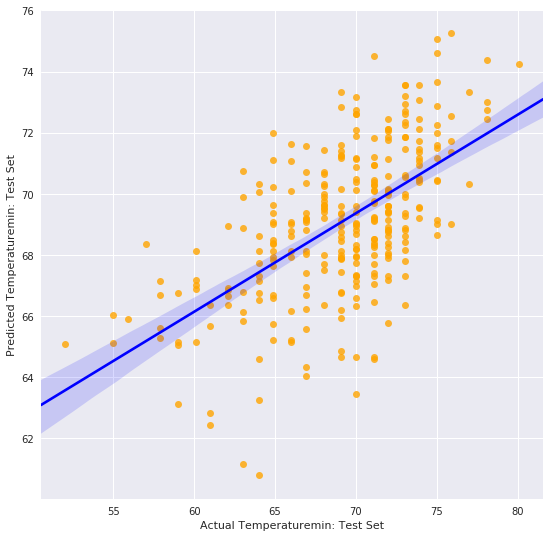

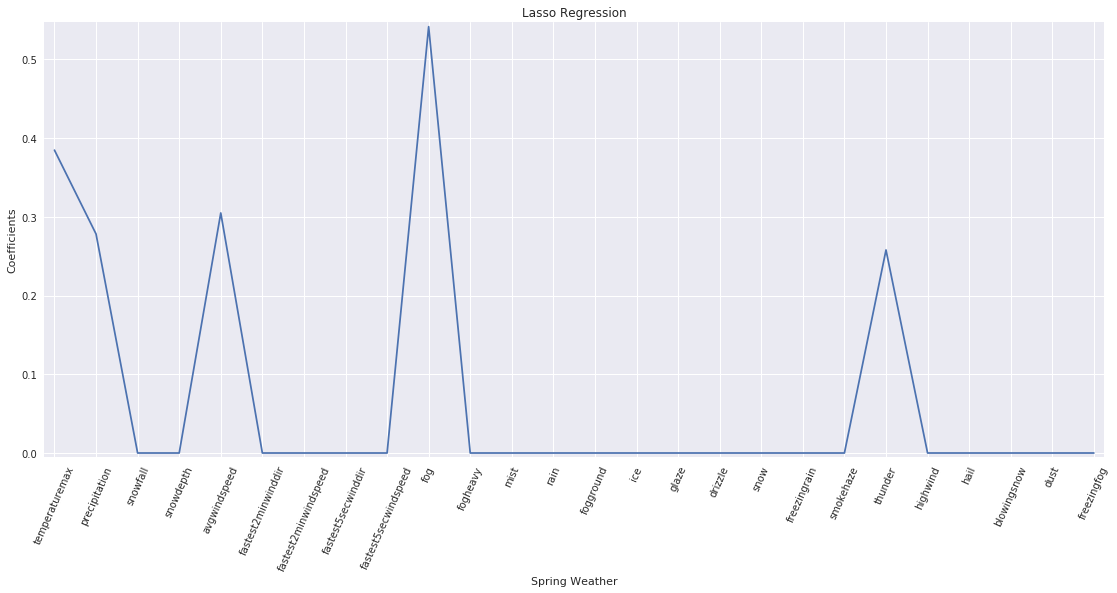

In [11]:
X_spring = spring_weather_history.drop('temperaturemin', axis=1)
X_spring = X_spring.drop('date', axis=1)
X_spring = X_spring.drop('season', axis=1)
X_spring.shape

y_spring = (spring_weather_history['temperaturemin'])
y_spring.shape

X_train, X_test, y_train, y_test = train_test_split(X_spring, y_spring, test_size = 0.3, random_state=42)

lasso = Lasso(alpha=0.015, normalize=True)
lasso.fit(X_train, y_train) 

lasso_coef = lasso.coef_
print("\nCoeficientes:\n", lasso_coef)
print("\nScore:",lasso.score(X_train, y_train))
print()
predict = lasso.predict(X_test)
#print(predict)

# Gráfico de dispersão das temperaturas mínimas
figure, axes = plt.subplots(figsize=(9, 9))
ax = sns.regplot(x = y_test, y = predict, scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax = ax.set(xlabel='Actual Temperaturemin: Test Set', 
ylabel = 'Predicted Temperaturemin: Test Set')

plt.figure(figsize=(19,8))
plt.plot(range(len(X_spring.columns)),lasso_coef)
plt.xticks(range(len(X_spring.columns)), X_spring.columns, rotation=66)
plt.margins(0.01)

plt.xlabel('Spring Weather')
plt.ylabel('Coefficients')
plt.title('Lasso Regression')
plt.show()

## 3.4. Lasso - Autumn Weather Dataset <a name="autumn"></a>


Coeficientes:
 [ 0.82274053  1.05572798 -0.          0.          0.7574394  -0.00811987
 -0.         -0.00231636 -0.          1.93733061  0.          0.
  1.42148259 -0.2244387   0.          0.          0.46616688  0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]

Score: 0.7668110225377774



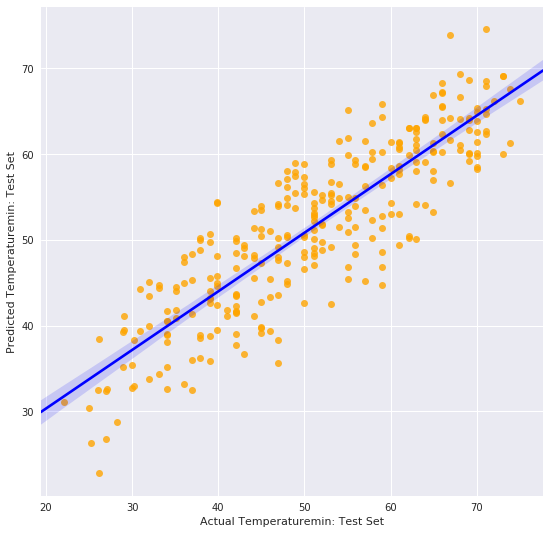

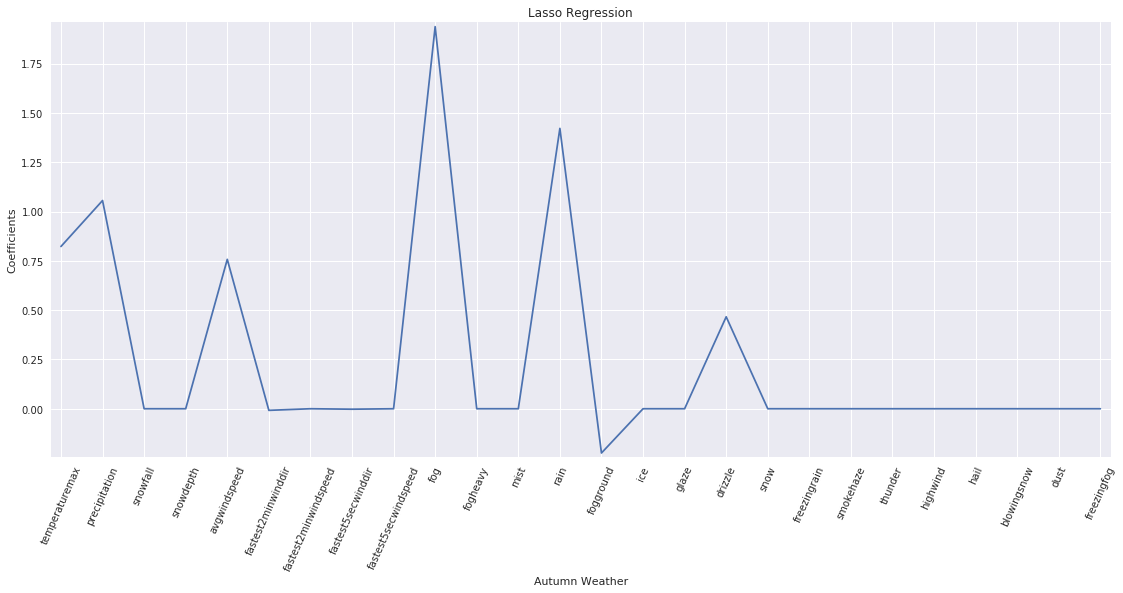

In [12]:
X_autumn = autumn_weather_history.drop('temperaturemin', axis=1)
X_autumn = X_autumn.drop('date', axis=1)
X_autumn = X_autumn.drop('season', axis=1)
X_autumn.shape

y_autumn = (autumn_weather_history['temperaturemin'])
y_autumn.shape

X_train, X_test, y_train, y_test = train_test_split(X_autumn, y_autumn, test_size = 0.3, random_state=42)

lasso = Lasso(alpha=0.03, normalize=True)
lasso.fit(X_train, y_train) 

lasso_coef = lasso.coef_
print("\nCoeficientes:\n", lasso_coef)
print("\nScore:",lasso.score(X_train, y_train))
print()
predict = lasso.predict(X_test)
#print(predict)

# Gráfico de dispersão das temperaturas mínimas
figure, axes = plt.subplots(figsize=(9, 9))
ax = sns.regplot(x = y_test, y = predict, scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax = ax.set(xlabel='Actual Temperaturemin: Test Set', 
ylabel = 'Predicted Temperaturemin: Test Set')

plt.figure(figsize=(19,8))
plt.plot(range(len(X_autumn.columns)),lasso_coef)
plt.xticks(range(len(X_autumn.columns)), X_autumn.columns, rotation=66)
plt.margins(0.01)

plt.xlabel('Autumn Weather')
plt.ylabel('Coefficients')
plt.title('Lasso Regression')
plt.show()

## 4. Referências <a name="references"></a>    

> [Coeficiente de correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson#Refer%C3%AAncias)

> [A comprehensive beginners guide for Linear, Ridge and Lasso Regression](https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/)



